In [1]:
import warnings
warnings.filterwarnings('ignore')

Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

Read csv file

In [3]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 Output column is the dependent variable whereas the rest are independent variables.

Check for null/NA values in the dataset

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

As there are no null/NA values, obtain random sample from the data to get and understanding of all the columns

In [5]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


Perform basic summary statistical analysis on numerical values in the dataframe.

In [11]:
df.drop(['sex', 'output', 'fbs', 'restecg', 'exng'], axis = 1).describe()

,age,cp,trtbps,chol,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,3.000000


As observed numerical columns such as age,chol do not have the same mean and median values indicating that the data is not symmetric. We obtain a graphical representation for the same below.

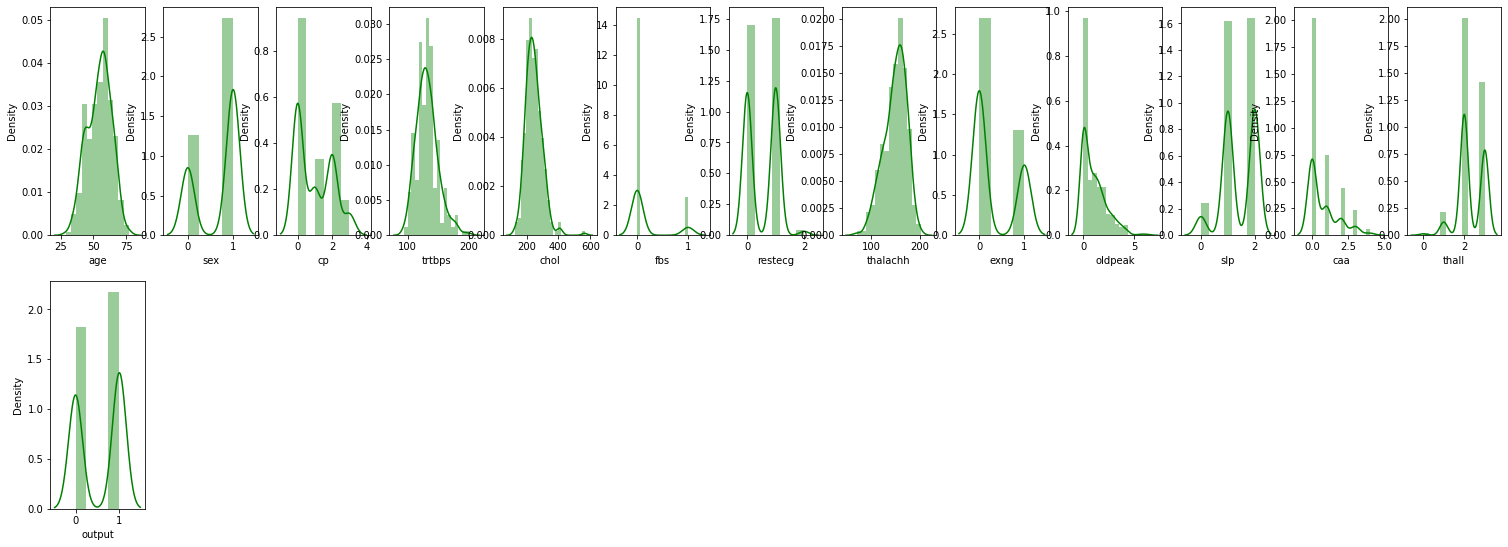

In [12]:
l = df.columns.values
number_of_columns=13
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(df.columns.values)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],color='green',kde=True) 

In [8]:
df['output'].unique()

array([1, 0])

Plot heatmap to understand correlation

<AxesSubplot:>

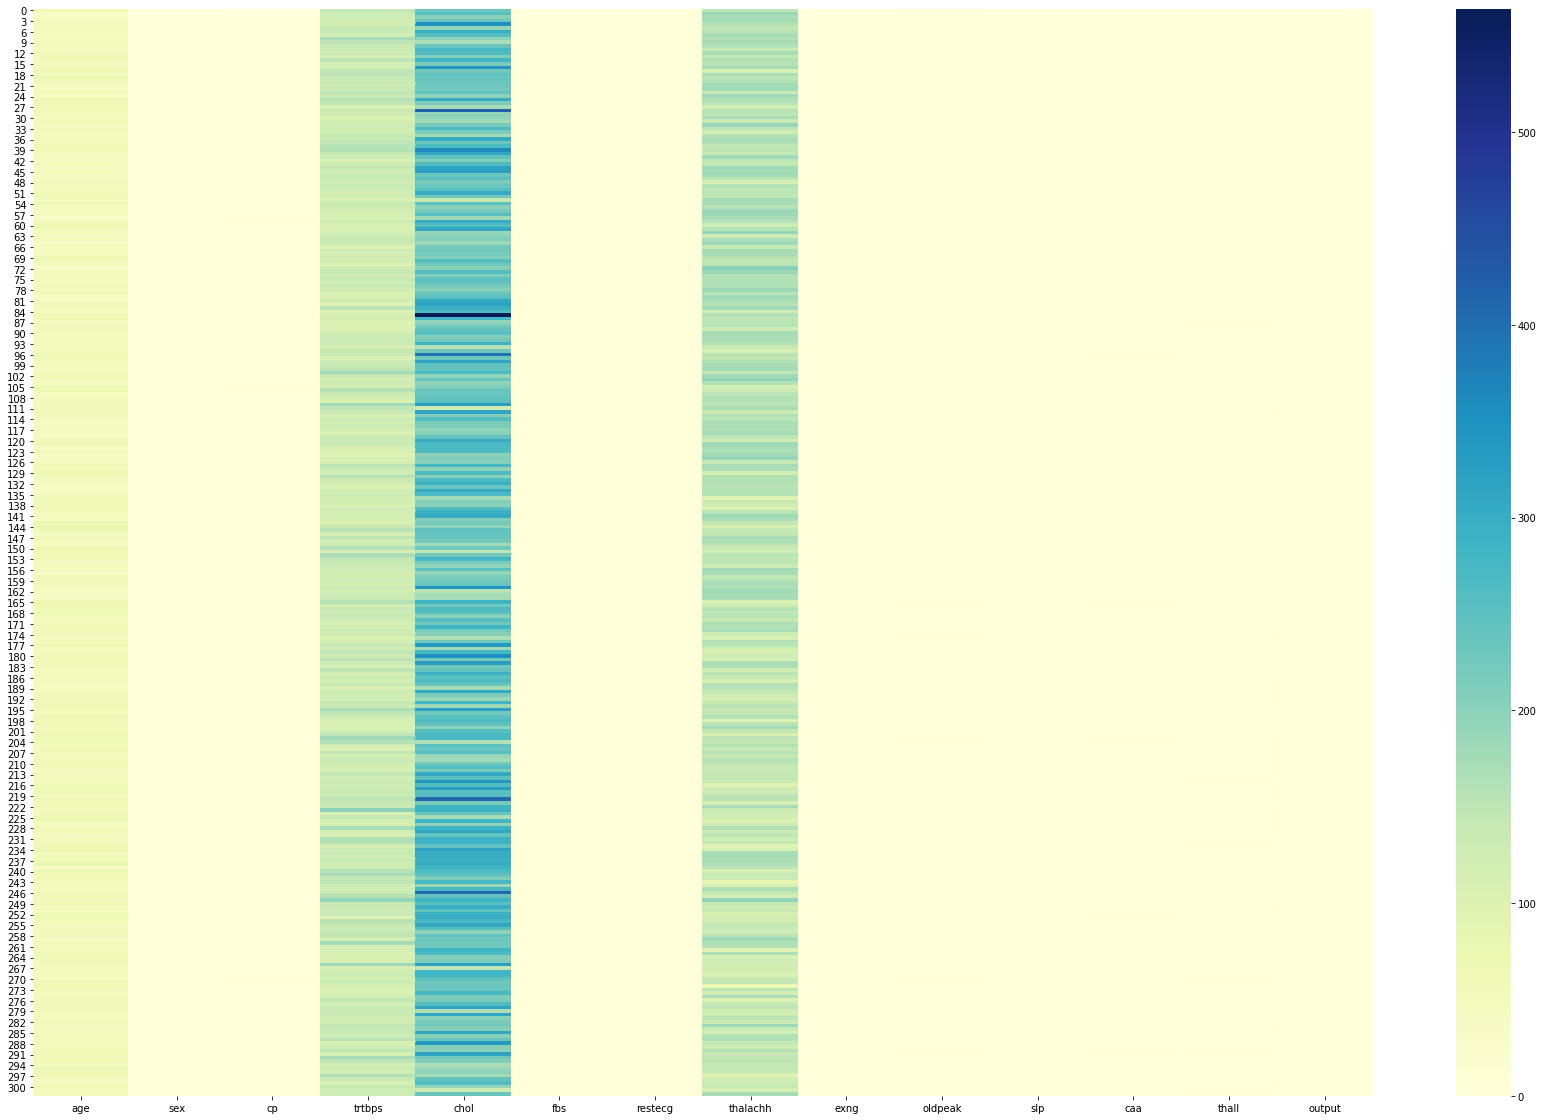

In [9]:
plt.figure(figsize=(30, 20))
sns.heatmap(df,cmap="YlGnBu")

Plot Boxplot to observe outliers

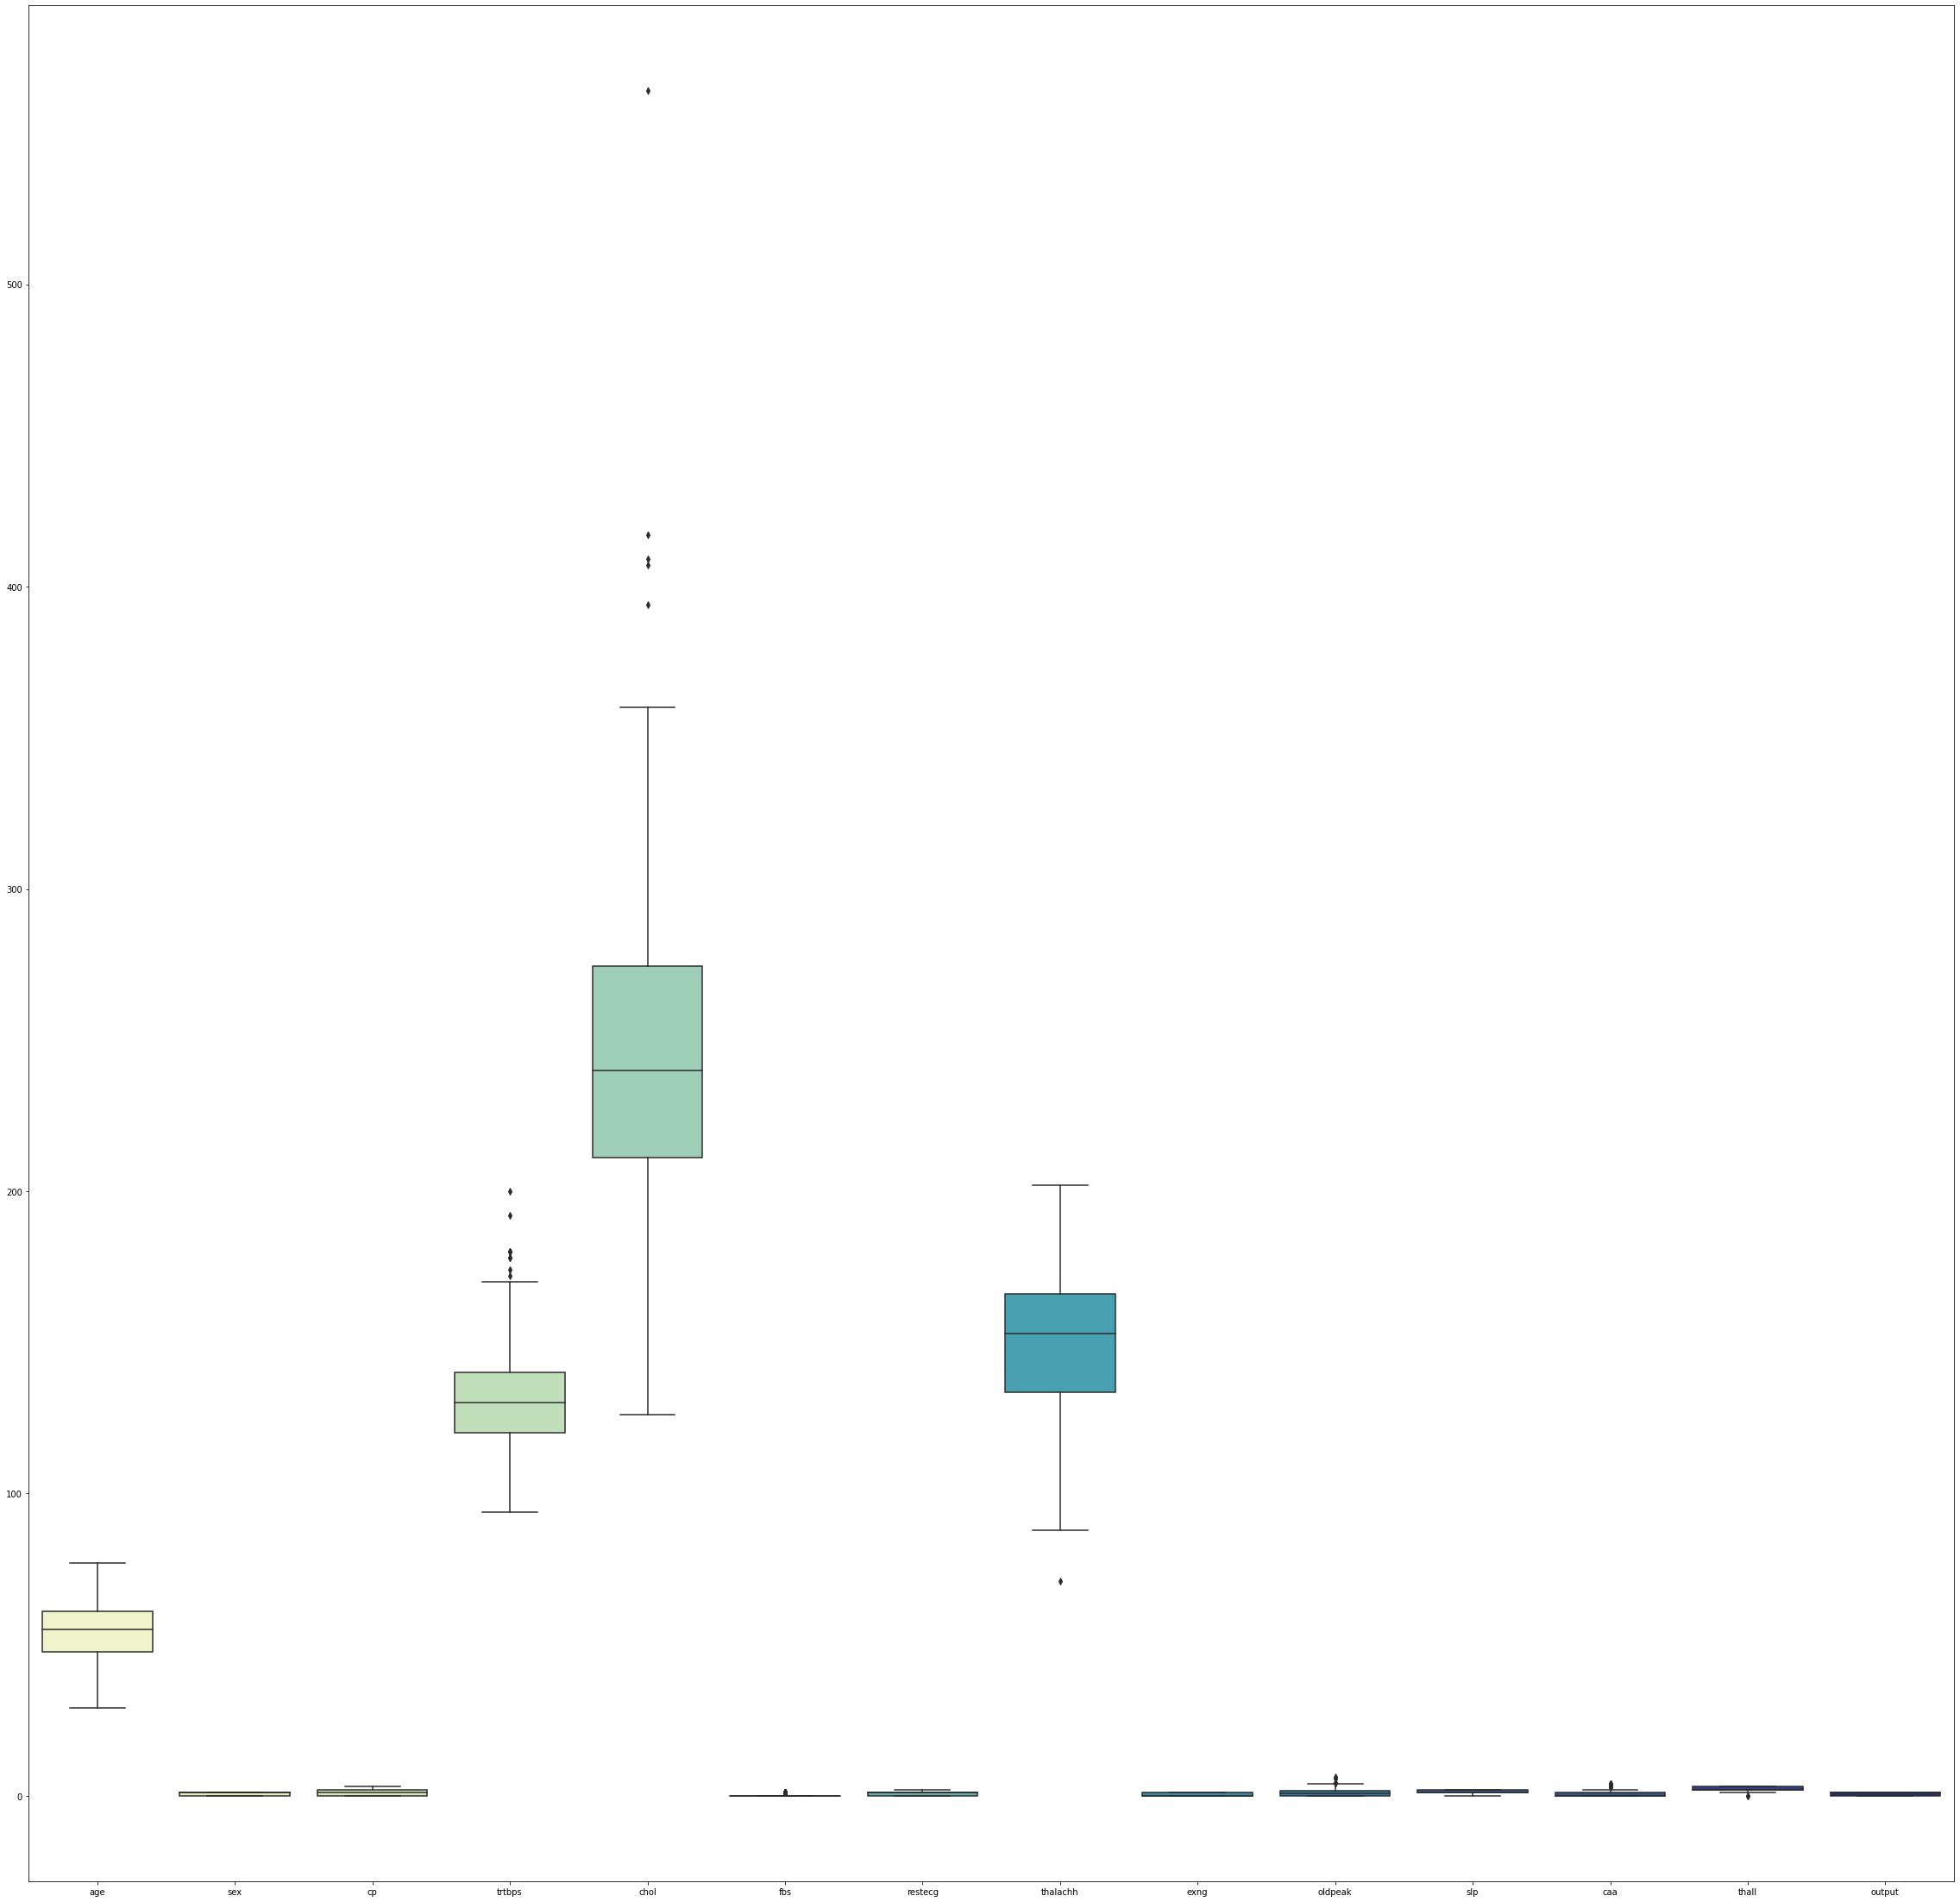

In [10]:
plt.figure(figsize=(40, 40))

ax = sns.boxplot(data=df,palette="YlGnBu")
